<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales </h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 2</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>

</div>

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [ ]:
rcParams['figure.figsize']= 14, 5
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False
rcParams['axes.prop_cycle']= cycler(color=['#101010'])
rcParams['lines.linewidth']= 2

In [ ]:
from IPython import display
display.set_matplotlib_formats("svg")

<ipython-input-3-c9c29f7cee36>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


**RUIDO BLANCO**

In [ ]:
ruido_blanco = np.random.randn(1000)

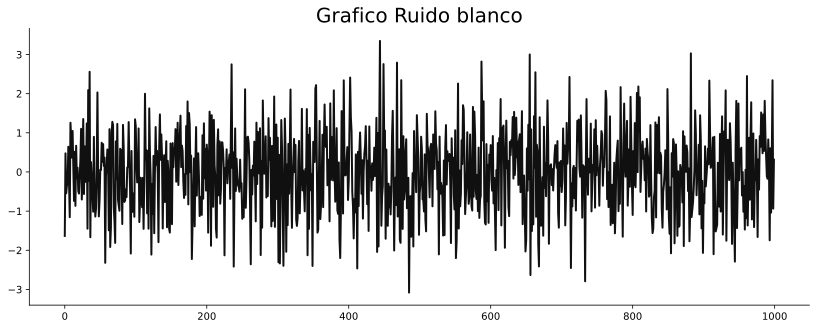

In [ ]:
plt.title("Grafico Ruido blanco", size=20)
plt.plot(np.arange(len(ruido_blanco)),ruido_blanco)

*COMENTARIO NUEVO 1*

Aqui vemos el ploteo de una serie simulada como ruido blanco. La grafica muestra similitudes con respecto al ejercicio 1, cuando se grafico la primera diferencia de la serie original.
¿ se llegan a ver las simulitudes ?

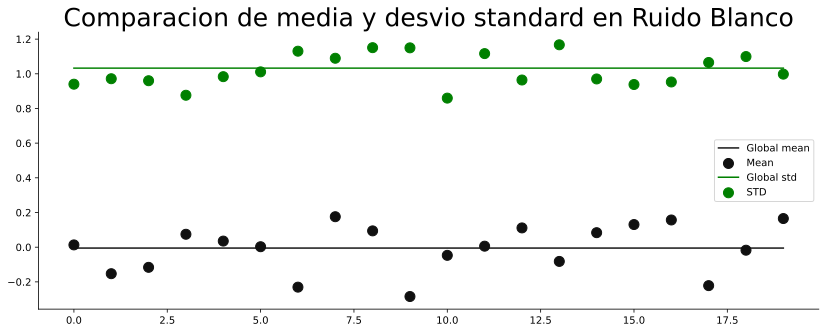

In [ ]:
ruido_blanco_chunks = np.split(ruido_blanco, 20)
means, stds = [], []

for chunk in ruido_blanco_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

plt.title('Comparacion de media y desvio standard en Ruido Blanco', size=25)
plt.plot(np.arange(len(means)), [ruido_blanco.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [ruido_blanco.std()] * len(stds), label='Global std', lw=1.5, color='green')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='green')
plt.legend();

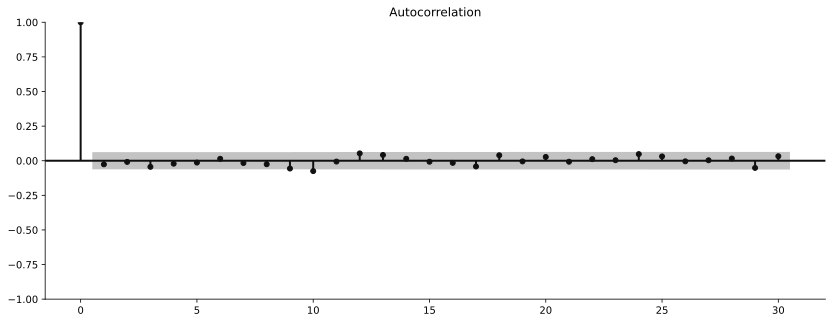

In [ ]:
plot_acf(np.array(ruido_blanco));

Camino aleatorio

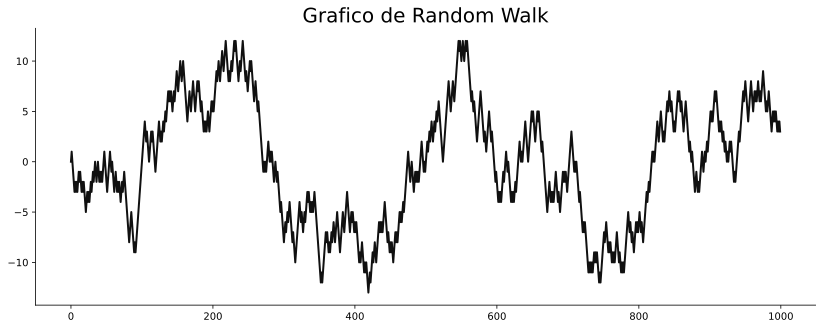

In [ ]:
random_walk = [0]

for i in range(1,1000):
  num= -1 if np.random.random() < 0.5 else 1
  random_walk.append(random_walk[-1] + num)

plt.title('Grafico de Random Walk', size=20)
plt.plot(np.arange(len(random_walk)), random_walk);

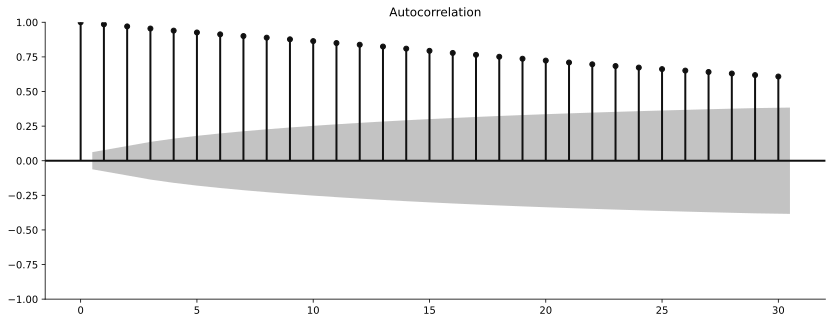

In [ ]:
plot_acf(np.array(random_walk));

In [ ]:
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

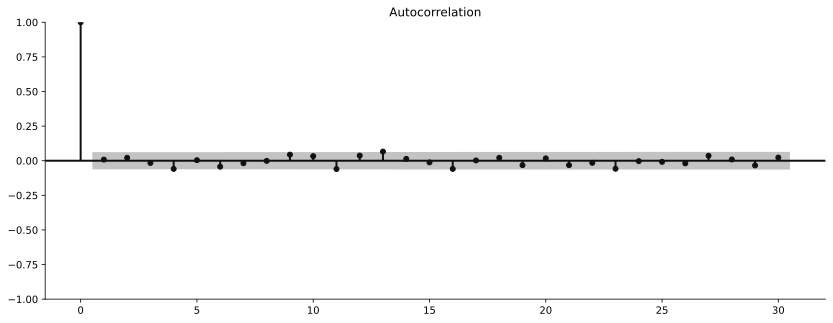

In [ ]:
plot_acf(np.array(s_random_walk_diff));

Ahora vamos a trabajar con un modelo AR2

In [ ]:
# Simulamos un modelo para ver sus caracteristicas

# parámetros del modelo AR(2)
phi_1 = 0.5
phi_2 = 0.2
sigma = 1.0
n = 1000


# Inicializar la serie con ceros
Y = np.zeros(n)

# Generar ruido blanco
np.random.seed(0)
epsilon = np.random.normal(0, sigma, n)

# Simular el proceso AR(2)
for t in range(2, n):
    Y[t] = phi_1 * Y[t-1] + phi_2 * Y[t-2] + epsilon[t]

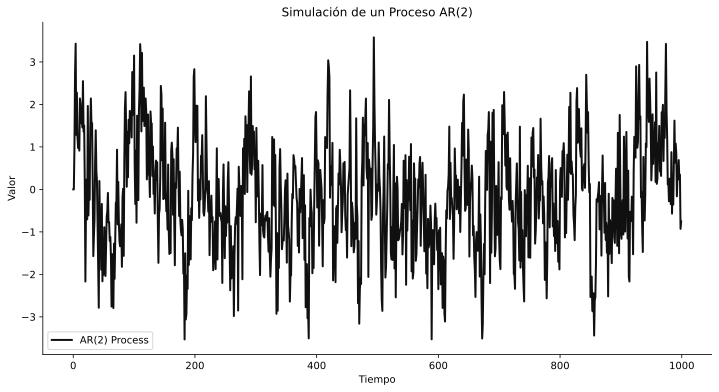

In [ ]:
# Grafica de la serie simulada
plt.figure(figsize=(12, 6))
plt.plot(Y, label='AR(2) Process')
plt.title('Simulación de un Proceso AR(2)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

<ipython-input-14-d6f8405ad0ab>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[2].stem(lags, autocov, use_line_collection=True)


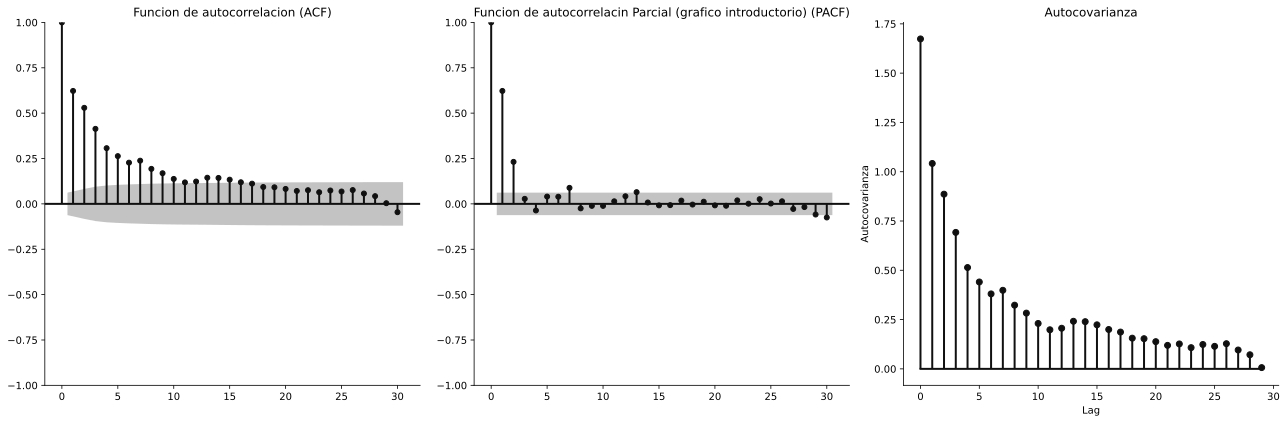

In [ ]:
# Grafica de ACF, PACF y autocovarianza

fig, ax = plt.subplots(1, 3, figsize=(18, 6))


sm.graphics.tsa.plot_acf(Y, lags=30, ax=ax[0])
ax[0].set_title('Funcion de autocorrelacion (ACF)')

sm.graphics.tsa.plot_pacf(Y, lags=30, ax=ax[1])
ax[1].set_title('Funcion de autocorrelacin Parcial (grafico introductorio) (PACF)')

def autocovariance(series, lag):
    series_mean = np.mean(series)
    n = len(series)
    return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

lags = np.arange(30)
autocov = [autocovariance(Y, lag) for lag in lags]

ax[2].stem(lags, autocov, use_line_collection=True)
ax[2].set_title('Autocovarianza')
ax[2].set_xlabel('Lag')
ax[2].set_ylabel('Autocovarianza')

plt.tight_layout()
plt.show()


Ahora se ve el proceso autoregresivo

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [ ]:
modeloAR2 = sm.tsa.arima.ARIMA(Y, order=(2,0,0))
resultadosAR2 = modeloAR2.fit()

In [ ]:
resultadosAR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1403.867
Date:                Tue, 24 Sep 2024   AIC                           2815.735
Time:                        22:09:59   BIC                           2835.366
Sample:                             0   HQIC                          2823.196
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1573      0.107     -1.467      0.142      -0.367       0.053
ar.L1          0.4779      0.031     15.434      0.000       0.417       0.539
ar.L2          0.2315      0.031      7.469      0.000       0.171       0.292
sigma2         0.9697      0.044     22.114      0.000       0.884       1.056
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.85   Prob(JB):                         0.87
Heteroskedasticity (H):               0.99   Skew:                             0.04
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<body>
  <h1> Fin ejercicio! </h1>
</body>